# Supercharge your scientific Python computations by learning how to use the NumPy library efficiently
## Ivan Idris

1. Chapter 1, Getting Started with NumPy: create a basic NumPy application.

2. Chapter 2, NumPy Basics: introductino to NumPy arrays and fundamentals.

3. Chapter 3, Basic Data Analysis with NumPy: data analysis with
weather data analysis and, explore the data from a KNMI
weather station.

4. Chapter 4, Simple Predictive Analytics with NumPy: attempt to predict
the weather with simple models, such as Autoregressive Model with Lag 1 and
Autoregressive Model with Lag 2.

5. Chapter 5, Signal Processing Techniques: examples of signal processing and
time series analysis, smoothing with window functions, and moving
averages, sifting process used by scientists to derive sunspot
cycles, a demonstration of cointegration.

6. Chapter 6, Profiling, Debugging, and Testing: profiling, debugging, and testing, unit testing, assert functions, and floating-point precision in depth.

7. Chapter 7, The Scientific Python Ecosystem: an overview of the Python ecosystem
in which NumPy takes a central role, examine Cython, which is a relatively
young programming language based on Python, a look at Clustering, a
type of machine learning algorithm.

In [76]:
# Import all the necessary libraries, just what is needed, nothing more, nothing less

import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import sklearn
import scipy 
from sklearn.datasets import load_sample_images
import sys
from scipy import signal
from scipy import interpolate

# This is will be used for building time series models
import statsmodels.api as stat
import statsmodels.tsa.stattools as ts

## Chapter One: Getting Started with NumPy

#### Adding arrays

In [2]:
def pythonsum(n):    
    """
    The methos takes two arrays and adds them using only native Python methods.
    arg
        n: The size of the array to be added
    rtn: Added arrays
    """
    a = [range(n)]
    b = [range(n)]
    c = []
    for i in range(len(a)):
        a[i] = i ** 2
        b[i] = i ** 3
        c.append(a[i] + b[i])
    return c

def numpysum(n):
    """
    The routine returns the sum of two arrays of a given size

    arg
        n: The size of the array to be added

    rtn: The sum of two arrays 
    """
    a = np.arange(n) ** 2
    b = np.arange(n) ** 3
    c = a + b
    return c

size = 1000
start = datetime.now()

c = pythonsum(size)
delta = datetime.now() - start

print("The last 2 elements of the sum: ", c[-2:])
print("PythonSum elapsed time in microseconds: {}".format(delta.microseconds))

start = datetime.now()
c = numpysum(size)
delta = datetime.now() - start

print("The last 2 elements of the sum{}".format(c[-2:]))
print("NumPySum elapsed time in microseconds()".format(delta.microseconds))

The last 2 elements of the sum:  [0]
PythonSum elapsed time in microseconds: 73
The last 2 elements of the sum[995007996 998001000]
NumPySum elapsed time in microseconds()


## Chapter Two:  NumPy Basics

The following topics will be covered in this chapter:

1. Data Types
2. Array Types
3. Typer Conversion
4. Creating Arrays
5. Indexing
6. Fancy Indexing
7. Slicing
8. Manipulating Shapes

### Loading and proprocessing data

Lets analize some cliamte data using NumPy. The data used in this analysis is downloaded form Kaggle, the link to the data set is provided below. Notice that NumPy can read CSV data using the __np.loadtxt__ function. However, handling date with Numpy is much cumbersome as compared to handling data with Pandas. 

#### Understanding the data set
The data set contains the year and month of recording data, average monthly temperature, uncertaintty in recorded temperature, city and country, and latitue and longitude of the city. The recording started from end of the 18th century. Data is recored monthly.

In [4]:
pathWeatherData = "../resources/data/archive/GlobalLandTemperaturesByCity.csv"
# Here, data is loaded into arrays with relevant names instead of a single matrix
(dateWeather
 , dailyTempWeather
 , countryWeather
 , cityWeather) = np.loadtxt(pathWeatherData
                            , usecols=(0, 1, 2, 3)
                            # Specify the datatype of the arrays, the default is flaot64
                            # datetime format is tricky!
                            , dtype=np.dtype([("date", "datetime64[s]")
                                              , ("avgTemp", np.float64)
                                              , ("city", str, 25)
                                              , ("country", str, 25)])
                            , skiprows=1
                            , delimiter=","
                            , unpack=True
                            # Bytes are decoded t0 "utf-8" format to convert them to string
                            , converters={0 : lambda x : x.decode("utf-8") or np.nan
                                         , 1 : lambda x : np.float64(x.strip() or np.nan)})

### Understanding the data
Let's understand some aggregate statistics

In [107]:
print("Maximum temperature is {:.2f}, and minimum temperature is {:.2f}".format(np.nanmax(dailyTempWeather)
                                                                          , np.nanmin(dailyTempWeather)))

print("Days when average temperature was below 0: {:.2f}%"
.format(len(dailyTempWeather[dailyTempWeather < 0])/len(dailyTempWeather)*100))

# Masked arrays are used for removing np.nan and np.PINF values from calculation
maskedDailyAvgTemp = np.ma.array(dailyTempWeather, mask = np.isnan(dailyTempWeather))

print("Mean average temperature {:.2f}, and mean uncertainty in average temperature {:.2f}"
.format(maskedDailyAvgTemp.mean(), maskedDailyAvgTemp.std()))

Maximum temperature is 39.65, and minimum temperature is -42.70
Days when average temperature was below 0: 7.11%
Mean average temperature 16.73, and mean uncertainty in average temperature 10.35


In [14]:
# Let's see if temperatues have gone up in the last half of the data, as compared to the first halpf of the data
# We can compare the average teperature for the bttom half of the data to that of the top half
# But that is not correct!

print("Average temperature for the first half of the data is {:.2f}, "\
    "and for the last half is {:.2f}".format(maskedDailyAvgTemp[:len(dailyTempWeather)//2].mean()
                                            , maskedDailyAvgTemp[len(dailyTempWeather)//2:].mean()))

Average temperature for the first half of the data is 17.18, and for the last half is 16.27


In [16]:
# We can find the median of the dates of observations and comapre averrage temperature before and after the median date
# This is better, although not correct still

medianDateWeather = np.sort(dateWeather)[len(dateWeather)//2]
print("Average temperature for the first half of the data is {:.2f}"\
", and for the last half is {:.2f}".format(maskedDailyAvgTemp[np.where(dateWeather<medianDateWeather)].mean()
                                            , maskedDailyAvgTemp[np.where(dateWeather>=medianDateWeather)].mean()))

Average temperature for the first half of the data is 15.47, and for the last half is 17.88


This difference in average, although not reliable, is a good prima facie evidence for further research

### Begning to visualize the data
We start with very simple visualizations to understand the data and brain storm, and gradually move on to some complex insigntful visualizations.

At look at global and local pictures.

#### A local analysis

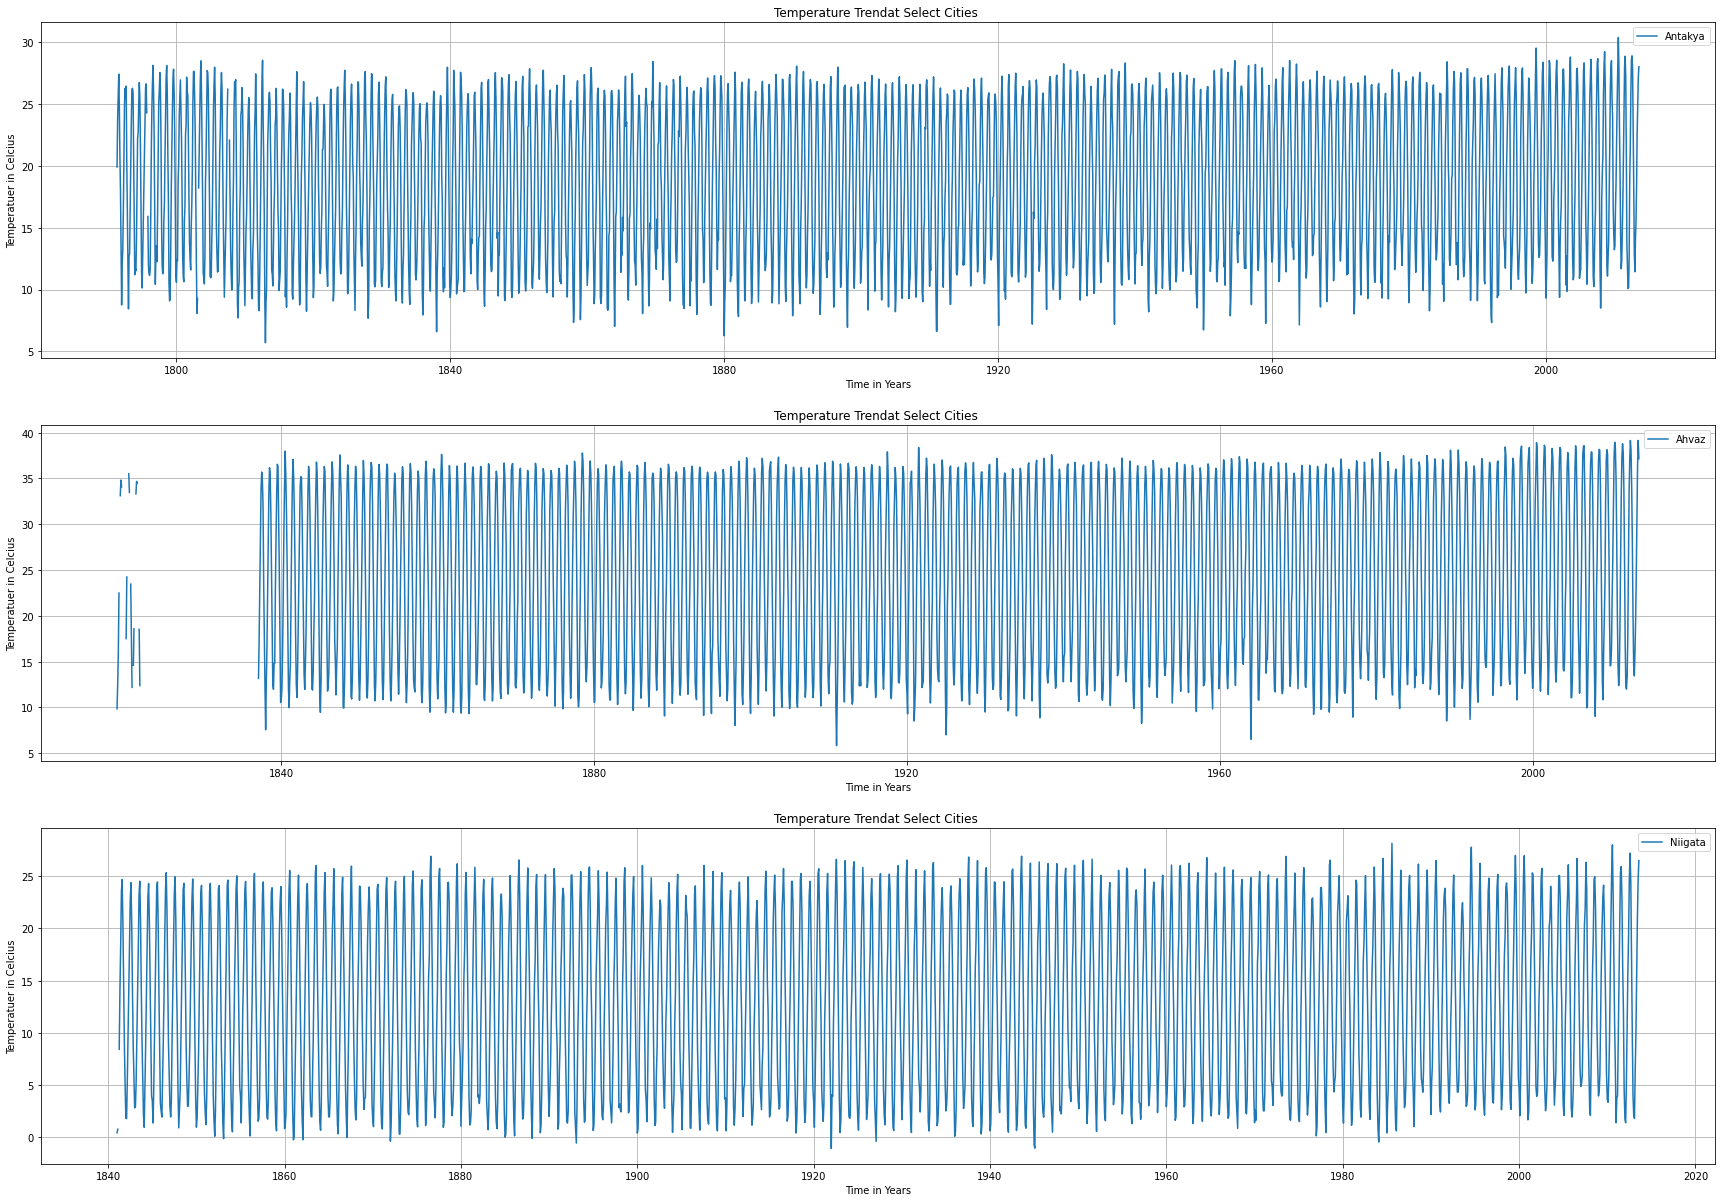

In [27]:
uniqueCitiesWeather = np.unique(cityWeather)
# Choose three unique cities at random
cities = uniqueCitiesWeather[np.random.randint(0,len(uniqueCitiesWeather),3)]

plt.figure(figsize=(30, 21))
plt.title("Temperature Trendat Select Cities ")

for i, city in enumerate(cities):
    plt.subplot(len(cities),1,i+1)
    plt.plot(dateWeather[np.where(cityWeather == city)]
             , dailyTempWeather[np.where(cityWeather == city)]
             , label=city)
    plt.legend()
    plt.xlabel("Time in Years")
    plt.ylabel("Temperatuer in Celcius")
    plt.grid()
    
plt.show()
del cities

#### Aggregrate analysis

Let's look at the tred of aggregate globaltemperature data

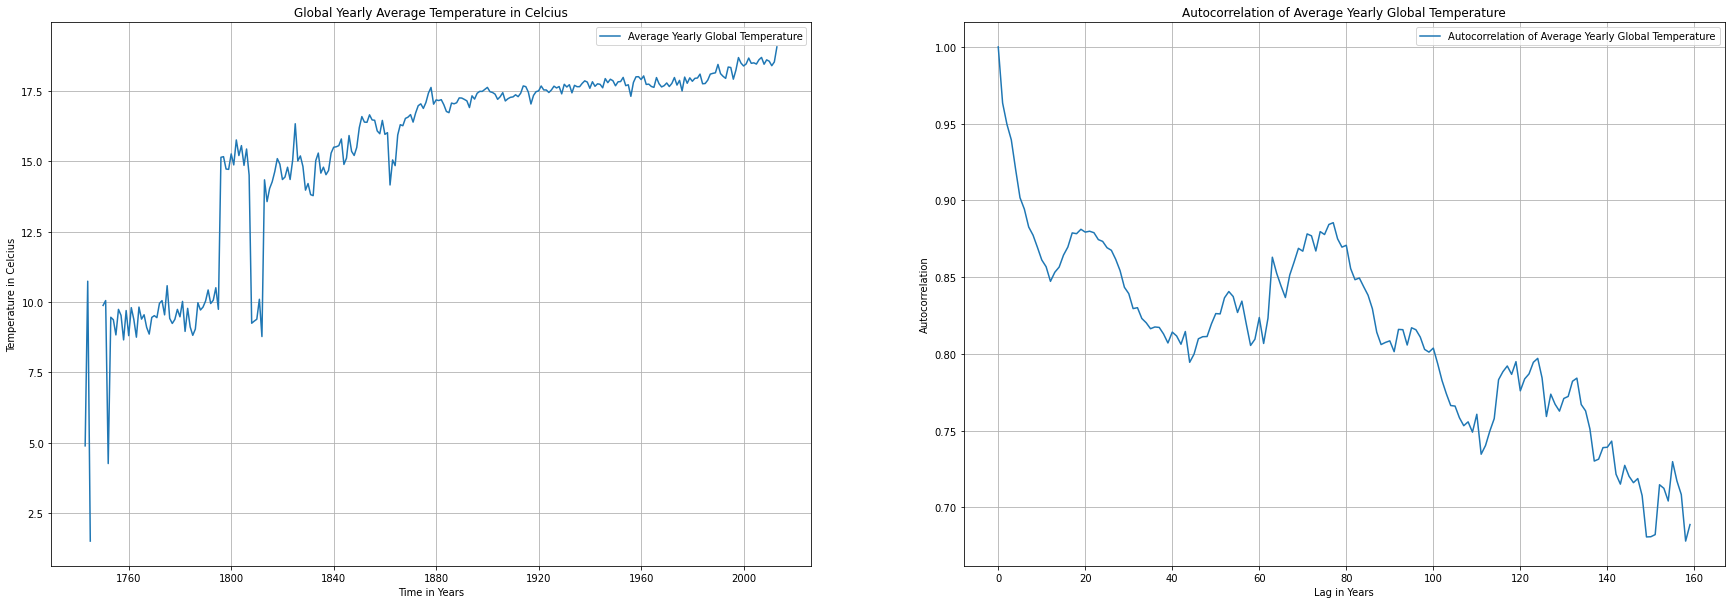

In [33]:
yearlyAvgTempWeather = np.array([])
# The datea array msut be cast into just years before finding unique years
years = np.unique(np.unique(dateWeather).astype("datetime64[Y]"))

plt.figure(figsize=(30, 10))

for year in years:
    indicesYearlyWeather = np.where(dateWeather.astype("datetime64[Y]") == year) 
    yearlyAvgTempWeather = np.append(yearlyAvgTempWeather
                                     , np.array([maskedDailyAvgTemp[indicesYearlyWeather].mean()]))

yearlyAvgTempWeather = np.ma.masked_invalid(yearlyAvgTempWeather)

plt.subplot(1, 2, 1)
plt.plot(years, yearlyAvgTempWeather, label="Average Yearly Global Temperature")
plt.legend()
plt.xlabel("Time in Years")
plt.ylabel("Temperature in Celcius")
plt.grid()
plt.title("Global Yearly Average Temperature in Celcius")

del indicesYearlyWeather
corrYearlyAvgTempWeather= np.array([1])

for i in range(1,160):
    # Notice that the avegares for the first 7 years contain nan vaules, so that part of the series is discarded
    value = np.corrcoef(yearlyAvgTempWeather[7:-i], yearlyAvgTempWeather[7+i:])[0,1]
    corrYearlyAvgTempWeather = np.append(corrYearlyAvgTempWeather, value)

plt.subplot(1, 2, 2)
plt.plot(range(corrYearlyAvgTempWeather.shape[0]), corrYearlyAvgTempWeather, label="Autocorrelation of Average Yearly Global Temperature")
plt.legend()
plt.xlabel("Lag in Years")
plt.ylabel("Autocorrelation")
plt.grid()
plt.title("Autocorrelation of Average Yearly Global Temperature")
plt.show()

#### Correlation statistics
The auto-correlation of the yearly average global temperature can give an interesting insight. Notice that the correlation coefficient remains moderate to high for a large range of lags. Further, it can be observed from the graph above that only the data collectd over the last 260 years is reliable.

A look at aggregrae analysis at local level

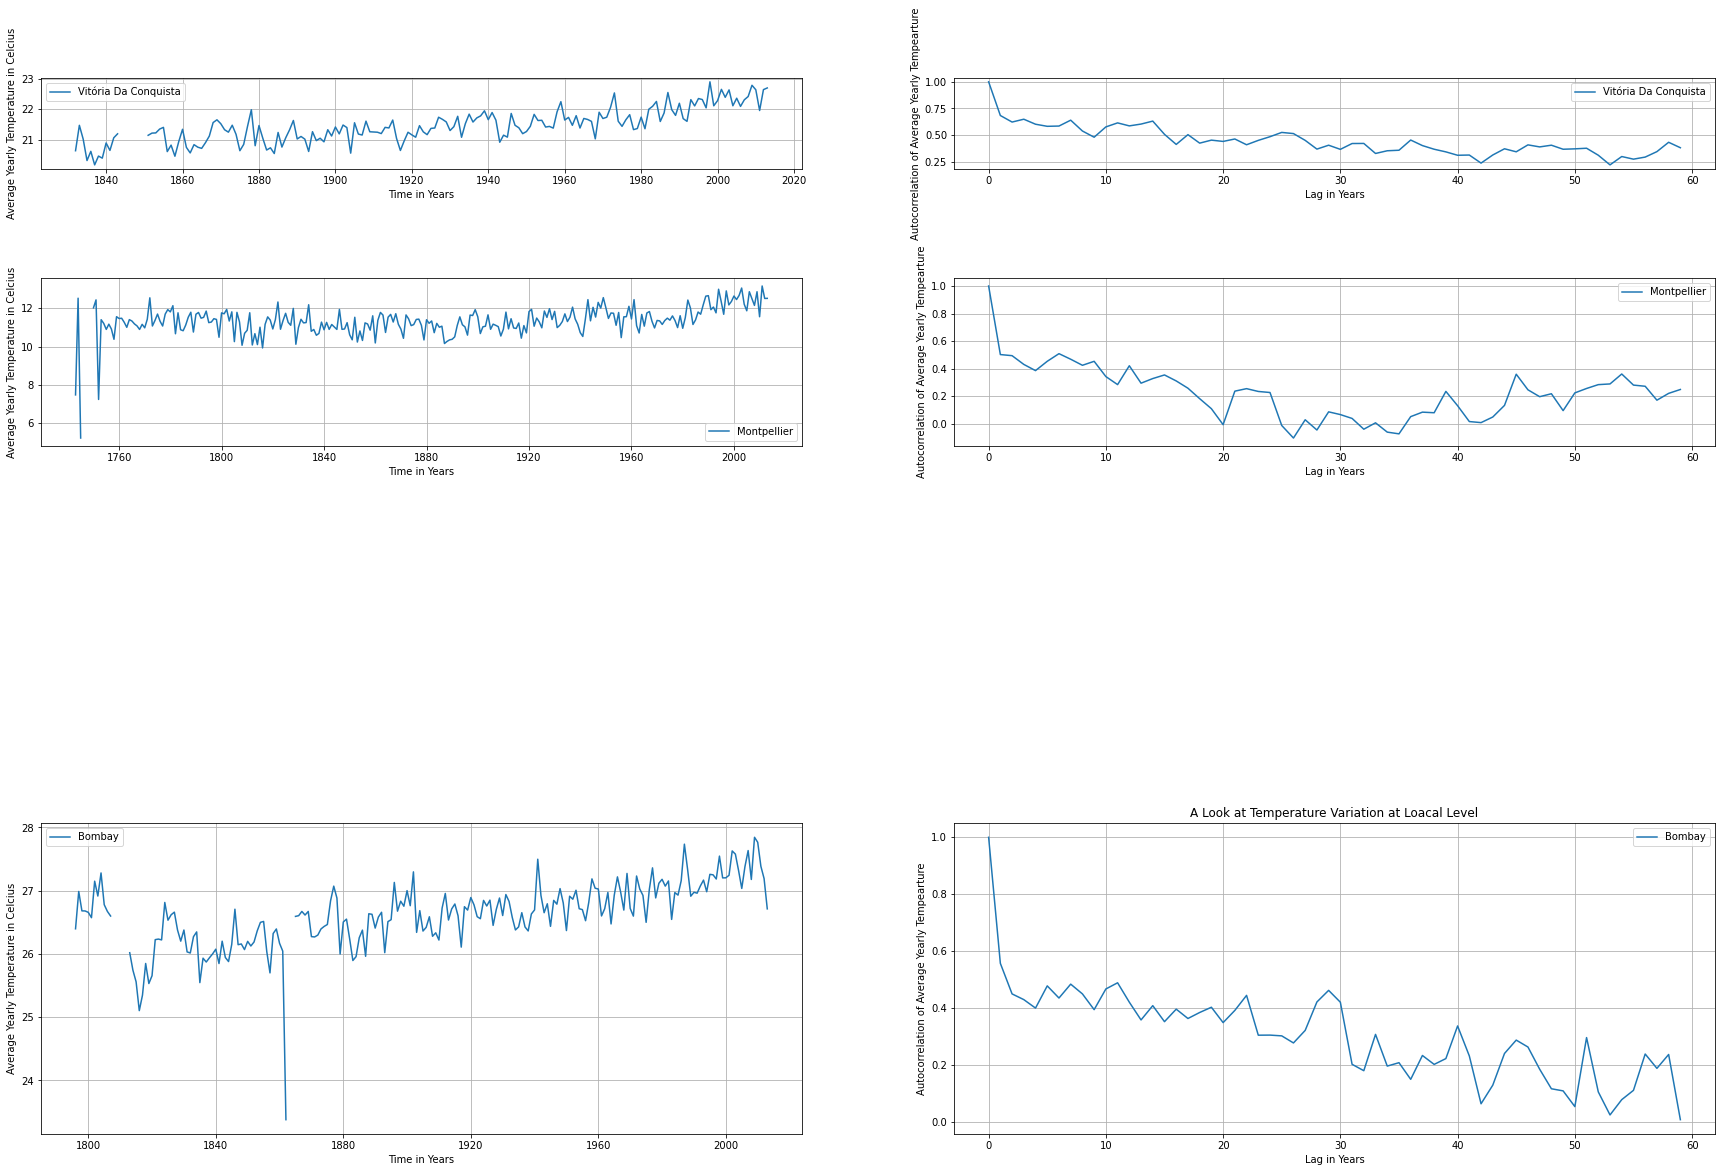

In [37]:
cities = uniqueCitiesWeather[np.random.randint(0,len(uniqueCitiesWeather),3)]

plt.figure(figsize=(30, 40))


for i, city in enumerate(cities):
    yearlyAvgTempCityWeather = np.array([])
    for year in years:
        indicesCity = np.where((dateWeather.astype("datetime64[Y]") == year) & (cityWeather == city))
        yearlyAvgTempCityWeather = np.append(yearlyAvgTempCityWeather
                                             , np.array([maskedDailyAvgTemp[indicesCity].mean()]))
    
    plt.subplot(len(city), 2, 2*i+1)
    plt.plot(years, yearlyAvgTempCityWeather, label=city)
    plt.legend()
    plt.xlabel("Time in Years")
    plt.ylabel("Average Yearly Temperature in Celcius")
    plt.grid()
    
    corrYearlyAvgTempWeather= np.array([1])
    
    # Only the data in the last 200 years is reliable, so lags can only be less
    for j in range(1,60):
        value = np.corrcoef(yearlyAvgTempCityWeather[-120:-j], yearlyAvgTempCityWeather[-120+j:])[0,1]
        corrYearlyAvgTempWeather = np.append(corrYearlyAvgTempWeather, value)

    plt.subplot(len(city), 2, 2*i+2)
    plt.plot(range(corrYearlyAvgTempWeather.shape[0]), corrYearlyAvgTempWeather, label=city)
    plt.xlabel("Lag in Years")
    plt.ylabel("Autocorrelation of Average Yearly Tempearture")
    plt.grid()
    plt.legend()    
plt.title("A Look at Temperature Variation at Loacal Level")
plt.show()

del indicesCity
del yearlyAvgTempCityWeather


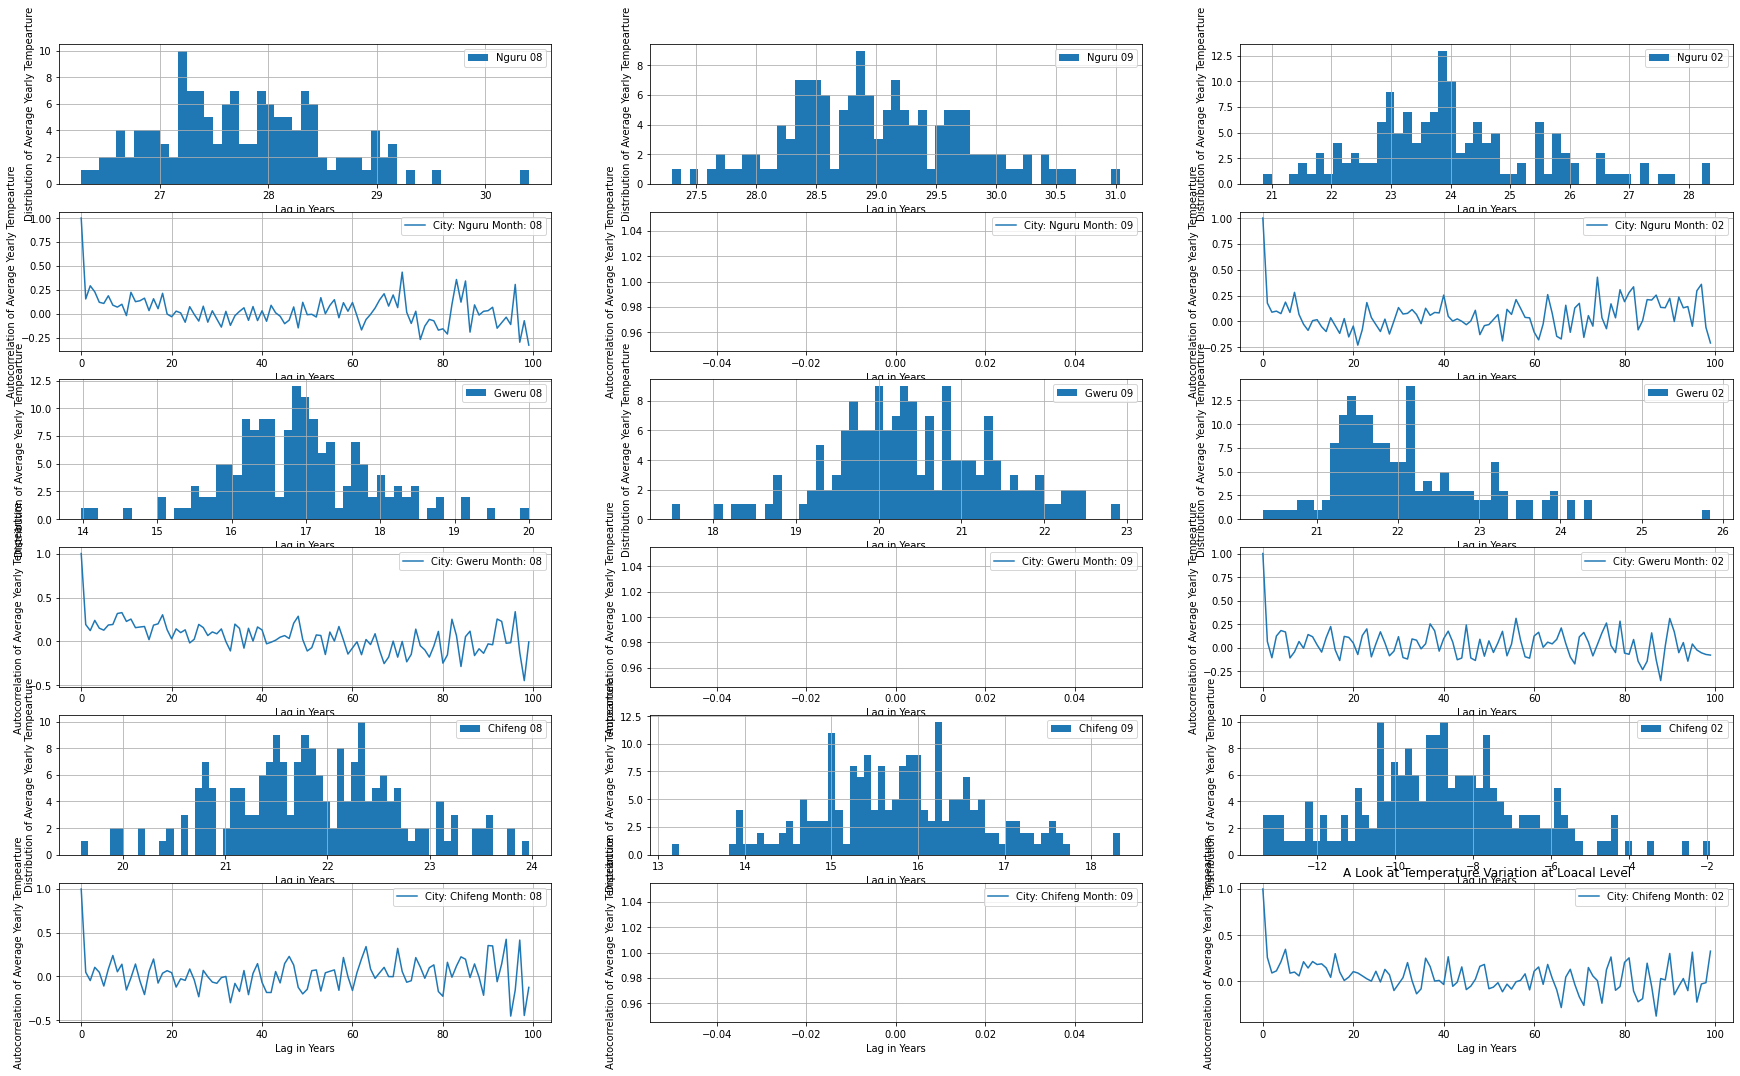

In [56]:
cities = uniqueCitiesWeather[np.random.randint(0,len(uniqueCitiesWeather),3)]

# NumPy datetime64 does not allow accessing months from dates conveniently
# Hence, date array is converted to Pandas datetime object and months are extracted from them
monthsWeatherSeries = pd.to_datetime(dateWeather).strftime("%m")

uniqueMonthsWeather = np.unique(monthsWeatherSeries)
months = uniqueMonthsWeather[np.random.randint(0, len(uniqueMonthsWeather), 3)]

plt.figure(figsize=(30, 18  ))

for i, city in enumerate(cities):
    for j, month in enumerate(months):
        indicesCityMonthWeather = np.where((monthsWeatherSeries == month) & (cityWeather == city))
        plt.subplot(2*len(cities), len(months), 3*2*i+j+1)
        plt.hist(maskedDailyAvgTemp[indicesCityMonthWeather]
                 , bins=np.linspace(np.min(maskedDailyAvgTemp[indicesCityMonthWeather])
                                    , np.max(maskedDailyAvgTemp[indicesCityMonthWeather])
                                    , len(dailyTempWeather[indicesCityMonthWeather])//3)
                 , label = (city+" "+month))
        plt.grid()
        plt.legend()
        plt.xlabel("Temperature in Celcius")
        plt.ylabel("Distribution of Average Yearly Tempearture")
        plt.legend()
        
        corrMonthCityTempWeather= np.array([1])
        
        for k in range(1,100):
            # Notice that the avegares for the first 7 years contain nan vaules, 
            value = np.corrcoef((dailyTempWeather[indicesCityMonthWeather])[-120:-k]
                                , (dailyTempWeather[indicesCityMonthWeather])[-120+k:])[0,1]
            corrMonthCityTempWeather = np.append(corrMonthCityTempWeather, value)
        
        plt.subplot(2*len(cities), len(months), 3*2*i+j+4)
        plt.plot(range(corrMonthCityTempWeather.shape[0]), corrMonthCityTempWeather, label="City: "+city+" Month: "+month)
        plt.grid()
        plt.legend()
        plt.xlabel("Lag in Years")
        plt.ylabel("Autocorrelation of Average Yearly Tempearture")
        plt.legend()
plt.title("A Look at Temperature Variation at Loacal Level")
plt.show()

In [39]:
pathRadiationData = "../resources/data/radiation_data/SolarPrediction.csv"

(dateRadiation
 , radiationRadiation
 , tempRadiaiton
 , windDirectionRadiation
 , windSpeedRadiation) = np.loadtxt(pathRadiationData
                                    , usecols = (0, 3, 4, 7, 8)
                                    
                                    # The data type of all variables, including date is np.float64
                                    , dtype=np.dtype([("dateRadiation", np.float64)
                                                      , ("tempRadiaiton", np.float64)
                                                      , ("radiationRadiation", np.float64)
                                                      , ("windDirectionRadiation", np.float64)
                                                      , ("windSpeedRadiation", np.float64)])
                                    , skiprows=1
                                    , delimiter=","
                                    , unpack=True
                                    # Temperature, and other varibales is loaded as np.float
                                    , converters={3 : lambda x : np.float64(x.strip() or np.nan)
                                                  , 4 : lambda x : np.float64(x.strip() or np.nan)
                                                  , 7 : lambda x : np.float64(x.strip() or np.nan)
                                                  , 8 : lambda x : np.float64(x.strip() or np.nan)})

In [44]:
# Convert flaot dates to datetime objects
dateRadiation = dateRadiation.astype("datetime64[s]")

print("The number of observations of radiation are : {:.2f}"\
", and temperature are {:.2f}".format(radiationRadiation.shape[0], tempRadiaiton.shape[0]))

print("The number of valid observations of radiation are : {:.2f}"\
", and temperature are {:.2f}".format(np.count_nonzero(~np.isnan(radiationRadiation))
                                       , np.count_nonzero(~np.isnan(tempRadiaiton))))

print("Mean solar radiation is : {:.2f}, and mean temperature is {:.2f}".format(radiationRadiation.mean()
                                                                          , tempRadiaiton.mean()))

"variation in solar radiation is {:.2f}, and temperature is {:.2f}".format(radiationRadiation.std()
                                                                           , tempRadiaiton.std())

print("maximum radiation is {:.2f}, and minimum radiation i s{:.2f}"\
", maximum temperature is {:.2f}, and minimum temperature is {:.2f}".format(radiationRadiation.max()
                                                                            , radiationRadiation.min()
                                                                            , tempRadiaiton.max()
                                                                            , tempRadiaiton.min()))

corr = np.corrcoef(radiationRadiation
                   , tempRadiaiton[np.logical_not(np.isnan(radiationRadiation))])
print("The correlation coefficient between temperature and solar radiation is: {:.2f}".format(corr[0,1]))

The number of observations of radiation are : 32686.00, and temperature are 32686.00
The number of valid observations of radiation are : 32686.00, and temperature are 32686.00
Mean solar radiation is : 207.12, and mean temperature is 51.10
maximum radiation is 1601.26, and minimum radiation i s1.11, maximum temperature is 71.00, and minimum temperature is 34.00
The correlation coefficient between temperature and solar radiation is: 0.73


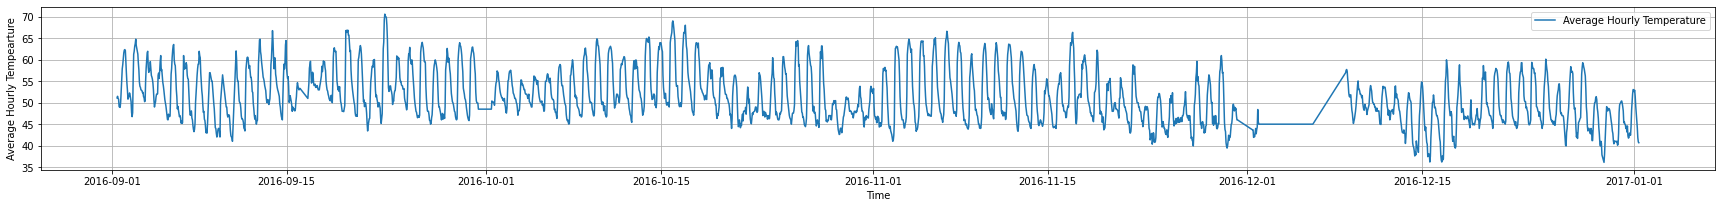

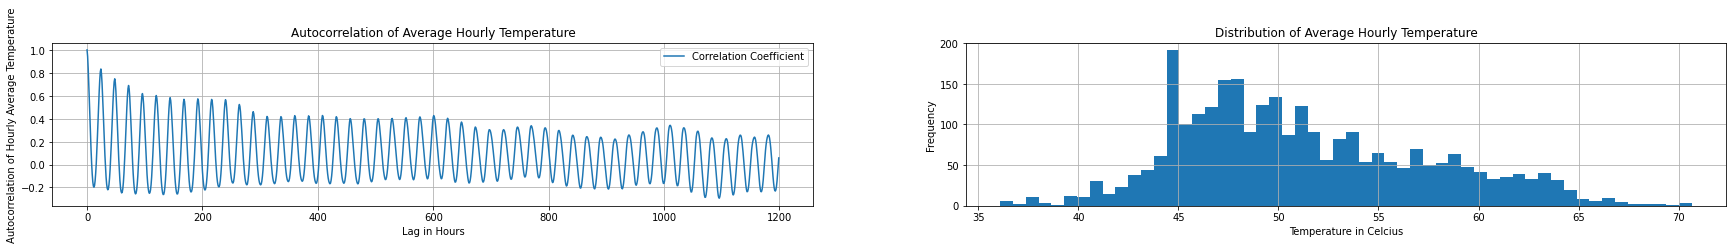

In [98]:
avgHourlyTeampRadiation = np.array([])
hoursRadiation = np.unique(dateRadiation.astype("datetime64[h]"))

for hour in hoursRadiation:
    indicesHourlyRadiation = np.where(dateRadiation.astype("datetime64[h]") == hour)
    avgHourlyTeampRadiation = np.append(avgHourlyTeampRadiation
                                        , tempRadiaiton[indicesHourlyRadiation].mean() or np.nan)

plt.figure(figsize=(30, 3))
plt.plot(hoursRadiation, avgHourlyTeampRadiation, label="Average Hourly Temperature")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Average Hourly Tempearture")
plt.grid()
plt.legend()
plt.show()

corrHourlyTempRadiation= np.array([1])

for k in range(1,1200):
    # Notice that the avegares for the first 7 years contain nan vaules, 
    value = np.corrcoef(avgHourlyTeampRadiation[k:], avgHourlyTeampRadiation[:-k])[0,1]

    # Store in a NumPy array
    corrHourlyTempRadiation = np.append(corrHourlyTempRadiation, value)

plt.figure(figsize=(30, 3))
plt.subplot(1, 2, 1)
plt.plot(range(corrHourlyTempRadiation.shape[0]), corrHourlyTempRadiation, label="Correlation Coefficient")
plt.xlabel("Lag in Hours")
plt.ylabel("Autocorrelation of Hourly Average Temperature")
plt.title("Autocorrelation of Average Hourly Temperature")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(avgHourlyTeampRadiation, bins = np.linspace(avgHourlyTeampRadiation.min()
                                                     , avgHourlyTeampRadiation.max()
                                                     , avgHourlyTeampRadiation.shape[0]//50))
plt.xlabel("Temperature in Celcius")
plt.ylabel("Frequency")
plt.grid()
plt.title("Distribution of Average Hourly Temperature")
plt.show()

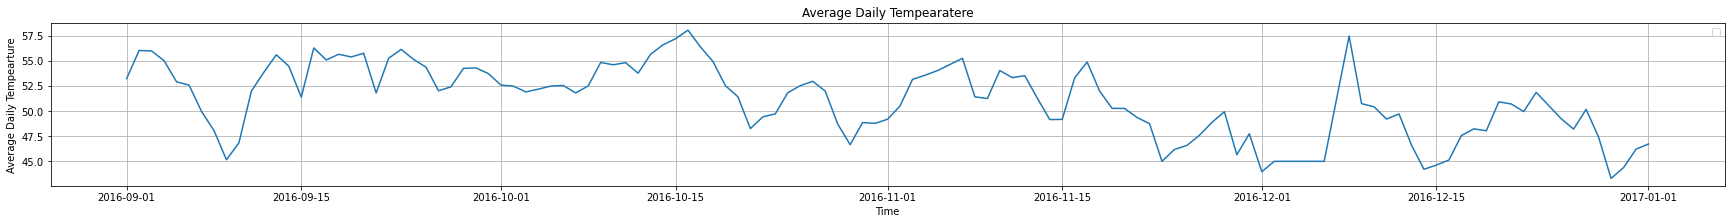

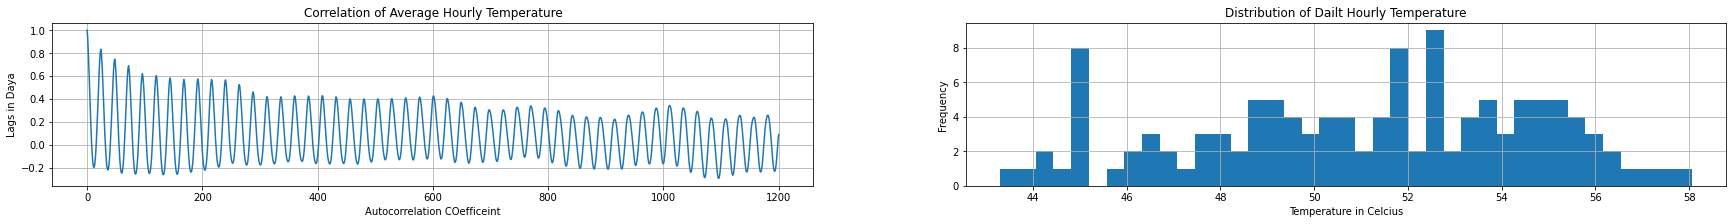

In [62]:
avgDailyTeampRadiation = np.array([])
daysRadiation = np.unique(dateRadiation.astype("datetime64[D]")) 

for day in daysRadiation:
    indicesDailyRadiation = np.where(dateRadiation.astype("datetime64[D]") == day)
    avgDailyTeampRadiation = np.append(avgDailyTeampRadiation, tempRadiaiton[indicesDailyRadiation].mean() or np.nan)

plt.figure(figsize=(30, 3))
plt.plot(daysRadiation, avgDailyTeampRadiation)
plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Average Daily Tempearture")
plt.legend()
plt.title("Average Daily Tempearatere")
plt.show()

corrDailyTempRadiation= np.array([1])

for k in range(1,100):
    # Notice that the avegares for the first 7 years contain nan vaules, 
    value = np.corrcoef(avgDailyTeampRadiation[k:], avgDailyTeampRadiation[:-k])[0,1]
    corrDailyTempRadiation = np.append(corrHourlyTempRadiation, value)

plt.figure(figsize=(30, 3))
plt.subplot(1, 2, 1)
plt.plot(range(corrDailyTempRadiation.shape[0]), corrDailyTempRadiation)
plt.xlabel("Autocorrelation COefficeint")
plt.ylabel("Lags in Daya")
plt.grid()
plt.title("Correlation of Average Hourly Temperature")

plt.subplot(1, 2, 2)
plt.hist(avgDailyTeampRadiation, bins=np.linspace(avgDailyTeampRadiation.min()
                                                  , avgDailyTeampRadiation.max()
                                                  , avgDailyTeampRadiation.shape[0]//3)
)
plt.xlabel("Temperature in Celcius")
plt.ylabel("Frequency")
plt.grid()
plt.title("Distribution of Dailt Hourly Temperature")
plt.show()

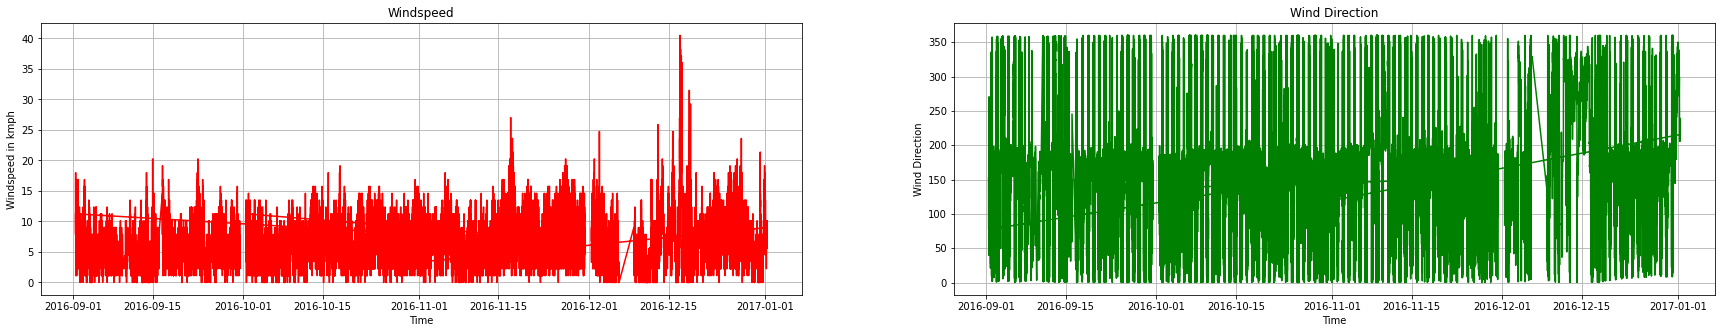

In [100]:
plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(dateRadiation, windSpeedRadiation, "r")
plt.ylabel("Windspeed in kmph")
plt.xlabel("Time")
plt.grid()
plt.title("Windspeed")

plt.subplot(122)
plt.plot(dateRadiation, windDirectionRadiation, "g")
plt.ylabel("Wind Direction")
plt.xlabel("Time")
plt.grid()
plt.title("Wind Direction")
plt.show()

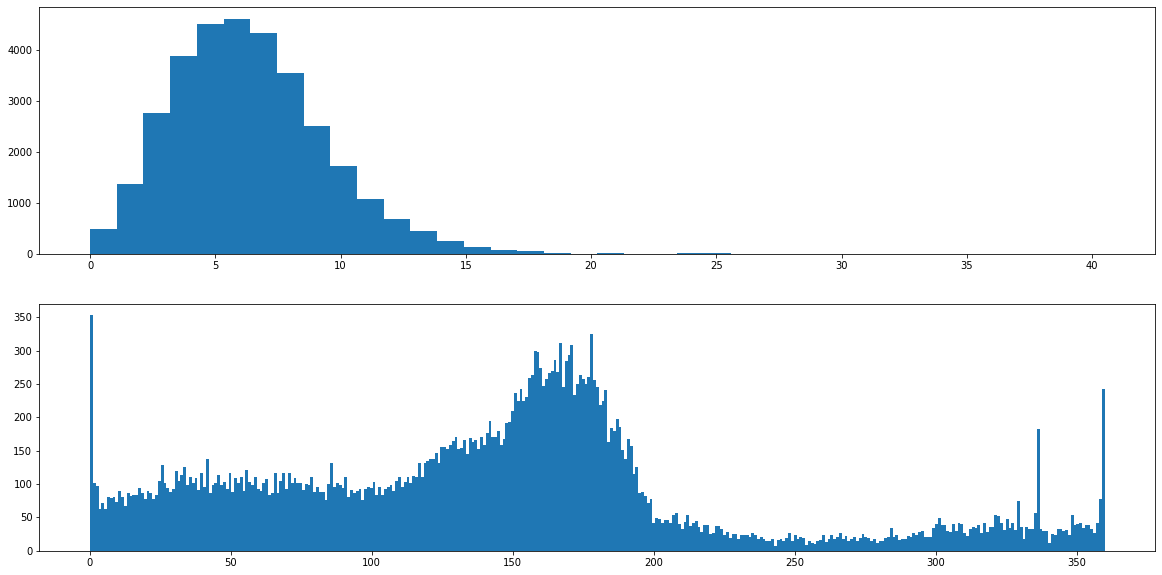

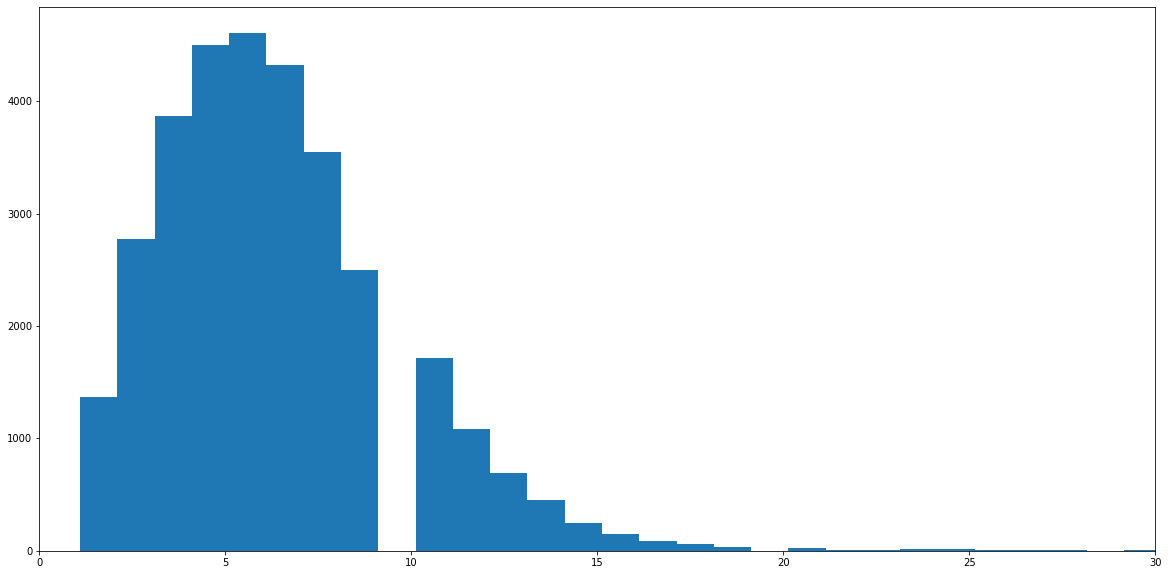

In [97]:
plt.figure(figsize=(20, 10))
plt.subplot(211)
binsWindSpeedRadiation = np.linspace(windSpeedRadiation.min(), windSpeedRadiation.max(), 39)
plt.hist(windSpeedRadiation, binsWindSpeedRadiation)

plt.subplot(212)
binsWindDirRadiation = np.linspace(windDirectionRadiation.min(), windDirectionRadiation.max(), 360)
plt.hist(windDirectionRadiation, binsWindDirRadiation)
plt.show()

plt.figure(figsize=(20, 10))
binsWindSpeedRadiation = np.linspace(windSpeedRadiation.min(), windSpeedRadiation.max(), 200)
plt.hist(windSpeedRadiation, binsWindDirRadiation)
plt.xlim(0, 30)
plt.show()

In [ ]:
windDirectionRadiation = ma.masked_invalid(windDirectionRadiation)

In [ ]:
for i in [2, 4, 6, 8, 10]:
    avgs = []
    for direction in range(0,360,i):
        indices = np.where((windDirectionRadiation > direction )& (windDirectionRadiation < direction+i))
        avgs.append(tempRadiaiton[indices].mean())
    plt.figure(figsize=(20, 10))
    plt.plot(np.arange(0,360,i)+0.5, avgs)
    plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(np.arange(0,360,2)+0.5, avgs)
plt.show()

In [ ]:
avgHourlyWindSpeedRadiation = np.array([])
for hour in np.unique(dateRadiation.astype("datetime64[h]")):
    indices = np.where(dateRadiation.astype("datetime64[h]") == hour)
    mean = windSpeedRadiation[indices].mean() or np.nan
    avgHourlyWindSpeedRadiation = np.append(avgHourlyWindSpeedRadiation, mean)
    print(mean)

In [ ]:
plt.plot(dateRadiation.astype("datetime64[h]"), avgHourlyWindSpeedRadiation)

In [ ]:
tempData = pd.Series(avgTemp, index=date)
tempData

In [ ]:
plt.figure(figsize=(20, 10))
pd.plotting.lag_plot(tempData, 10)
plt.show()

In [ ]:
tempDataRadiation = pd.Series(tempRadiaiton, index=dateRadiation)
tempDataRadiation

In [ ]:
plt.figure(figsize=(20, 10))
pd.plotting.autocorrelation_plot(tempDataRadiation)

In [ ]:
aCity = np.unique(city)[10]

In [ ]:
len(avgTemp)

In [ ]:
indices = np.where(city == aCity)

In [ ]:
pd.plotting.lag_plot(pd.Series(avgTemp[indices], index = date[indices]), 12)

In [ ]:
indices

In [ ]:
aSeries = pd.Series(avgTemp[indices], index = date[indices])
for i in range(1,13):
    plt.figure(figsize = (5, 5))
    pd.plotting.lag_plot(aSeries, i)
    plt.show()


In [ ]:
pd.plotting.autocorrelation_plot(aSeries[-20:])

In [ ]:
autoR = [pd.Series.autocorr(aSeries, i) for i in range(len(aSeries))]
autoR

In [ ]:
plt.plot(range(120), autoR[:120])

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(date[indices], avgTemp[indices])

In [ ]:
pd.Series(avgTemp[indices], index = date[indices])

In [ ]:
plt.figure(figsize=(20, 10))
pd.plotting.autocorrelation_plot?

In [ ]:
plt.figure(figsize=(20, 10))
aSeries.resample("A").plot()[0]
plt.show()

In [ ]:
plt.plot(anotherSeries.resample("A").mean())

In [ ]:
monthlyTemp = anotherSeries.groupby(anotherSeries.index.strftime("%B")).mean()

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(monthlyTemp.sort_index())

In [ ]:
anotherSeries.index

In [ ]:
stocksData = pd.read_csv("../Documents/coding/greatLearnings/resources/data/stocksData/NIFTY50_all.csv", index_col= "Date")

In [ ]:
stocksData

In [ ]:
maskedArray = ma.masked_invalid(dailyTempWeather)
montlyMeanTempBerlinWeather = np.array([])
for month in range(12):
    monthlyIndices = np.where(np.int64(dateWeather.astype(object)).month == month and cityWeather == "Berlin")
    montlyMeanTempBerlinWeather = np.append(montlyMeanTempBerlinWeather, maskedArray[monthlyIndices].mean())
    print(maskedArray[monthlyIndices].mean())

In [ ]:
cutoff = 9 * len(tempRadiaiton)//10
cutoff

In [ ]:
poly = np.polyfit(tempRadiaiton[:cutoff-1], tempRadiaiton[1:cutoff], 2)
poly

In [ ]:
fit = np.polyval(poly, tempRadiaiton[cutoff:-1])
fit

In [ ]:
((tempRadiaiton[cutoff+1:]-fit)**2).mean()

In [ ]:

plt.plot(tempRadiaiton[cutoff:-1], tempRadiaiton[cutoff+1:])

In [ ]:
(x, residuals, rank, s) = np.linalg.lstsq(np.vstack((tempRadiaiton[:cutoff-2], tempRadiaiton[1:cutoff-1])).T, tempRadiaiton[2:cutoff])

In [ ]:
x

In [ ]:
fit = x[0]*tempRadiaiton[cutoff-1:-2] + x[1]*tempRadiaiton[cutoff:-1] 

In [ ]:
delta = tempRadiaiton[cutoff + 1:] - fit

In [ ]:
delta.max()

In [ ]:
plt.hist(delta, bins = np.linspace(np.floor(delta.min()), np.floor(delta.max()), 1000))
plt.show()

In [ ]:
    dateWeather.astype(object).month

## Chapter Five: Signal Processing Techniques
A number of interesting thigs can be accompolished in the domain of signal processing wth Python and NumPy.

1. Determining periodic cycles within the data.
2. Smoothing the data to filter out noise.
3. Forecasting

### Introduction to the Sunspot data

In [63]:
path = "../resources/data/sunspot_data2/Sunspots.csv"
(dateSunspot, sunspotsSunspot) = np.loadtxt(path
                                            , usecols=(1, 2)
                                            , unpack=True
                                            , skiprows=1
                                            , delimiter=","
                                            # Again, this datetime654[s] thing is confusing
                                            , dtype=np.dtype([("date", "datetime64[s]")
                                                             , ("sunspots", np.float64)])
                                            , converters={1: lambda x: x.decode("utf-8")
                                                          , 2: lambda x: np.float64(x.strip() or nan)})

Let us try to undestand the data before we proceed to any analysis.


In [65]:
print("The number of records is {}, and {} records are invalid.".format(sunspotsSunspot.shape[0], np.isnan(sunspotsSunspot).sum()))
print("The mean of the data is {:.2f}, the median is {:.2f}, the maximum is {:.2f}"\
    ", the minimum is {:.2f}, the standard deviation is {:.2f}".format(np.mean(sunspotsSunspot)
                                                                       , np.median(sunspotsSunspot)
                                                                       , np.max(sunspotsSunspot)
                                                                       , np.min(sunspotsSunspot)
                                                                       , np.std(sunspotsSunspot)))


The number of records is 3265, and 0 records are invalid.
The mean of the data is 81.78, the median is 67.20, the maximum is 398.20, the minimum is 0.00, the standard deviation is 67.88


Having a user defined autocorrelation function will help in get statistics latter

In [66]:
def autoCorrelation(data):
    """
    The function takes a data array, and calculates autocorrelation at lags ranging from one to nine-thenth of the length of the array.

    Notice that the unit of lag is the same as the duration between two observations.

    arg
        data: The NumPy array whose autocorrelation has to be calculated.

    rtn: A NumPy array containing autocorrelations at different lags.

    """
    autoCorrelationData = np.array([1])
    for lag in range(9*data.shape[0]//10):
        autoCorrelationData = np.append(autoCorrelationData
                                        , np.corrcoef(data[lag+1:], data[:-(lag+1)])[0,1])

    return autoCorrelationData

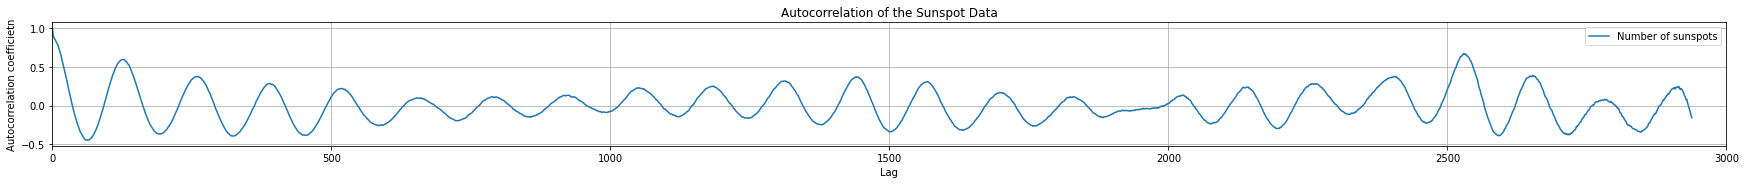

In [73]:
sunspotAutoCorrelationSunspot = autoCorrelation(sunspotsSunspot)

plt.figure(figsize=(30, 5))
plt.subplot(2, 1, 1)
plt.plot(sunspotAutoCorrelationSunspot, label="Number of sunspots")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation coefficietn")
plt.grid()
plt.title("Autocorrelation of the Sunspot Data")
plt.xlim((0,3000))
plt.legend()
plt.show()

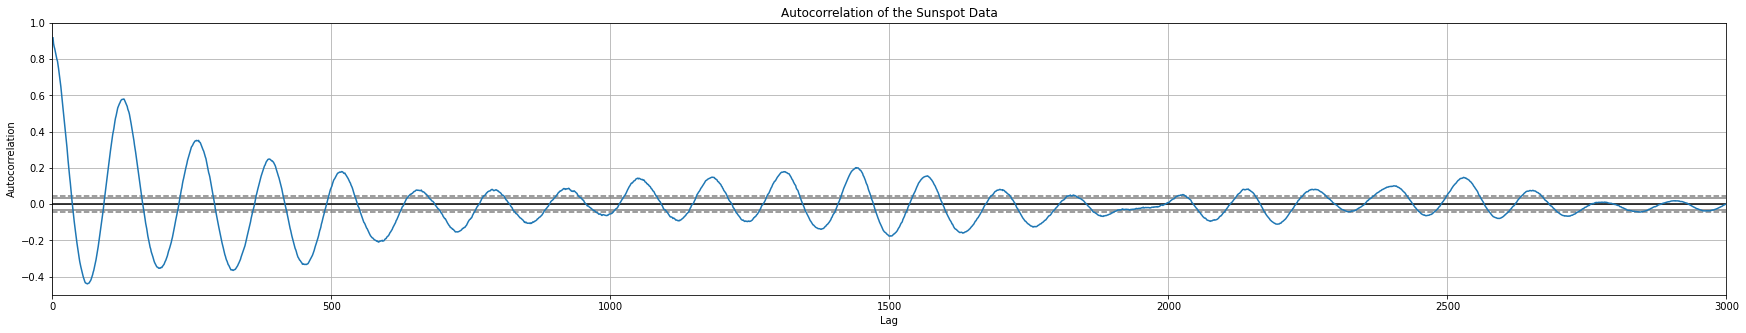

In [69]:
plt.figure(figsize=(30, 5))
pd.plotting.autocorrelation_plot(pd.Series(sunspotsSunspot, index=dateSunspot))
plt.title("Autocorrelation of the Sunspot Data")
plt.xlim((0,3000))
plt.ylim((-0.5, 1))
plt.show()

A look at the data can be helpful in understanding it well

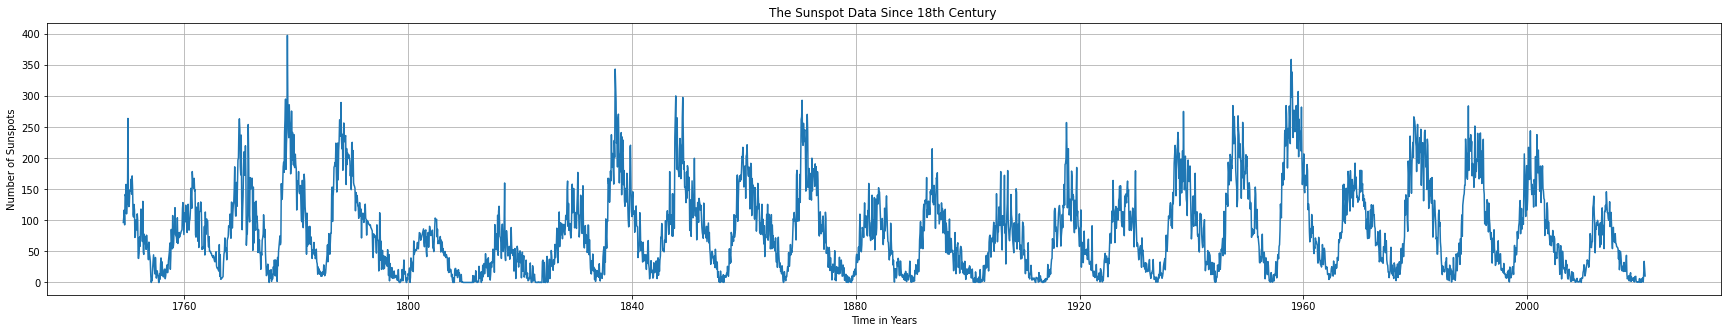

In [70]:
plt.figure(figsize=(30, 5))
plt.plot(dateSunspot, sunspotsSunspot)
plt.title("The Sunspot Data Since 18th Century ")
plt.xlabel("Time in Years")
plt.ylabel("Number of Sunspots")
plt.grid()
plt.show()

We can find out the local minimum and maximum of the data using signal module in scipy. Local extrema can be useful in ploting bounds of the data

In [77]:
minsLocalSunspot = signal.argrelmin(sunspotsSunspot)[0]
maxsLocalSunspot = signal.argrelmax(sunspotsSunspot)[0]
extremaLocalSunspot = np.concatenate((minsLocalSunspot, maxsLocalSunspot))

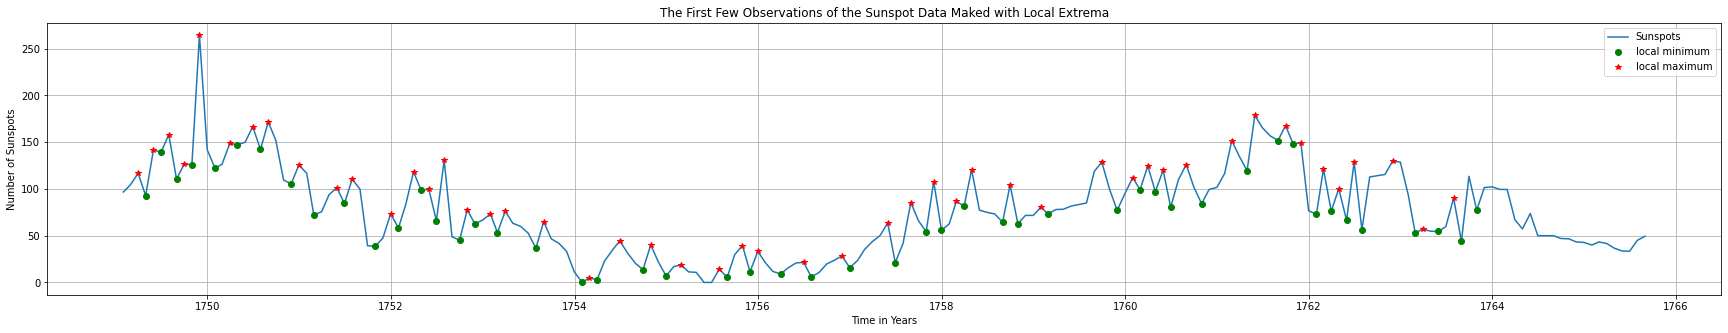

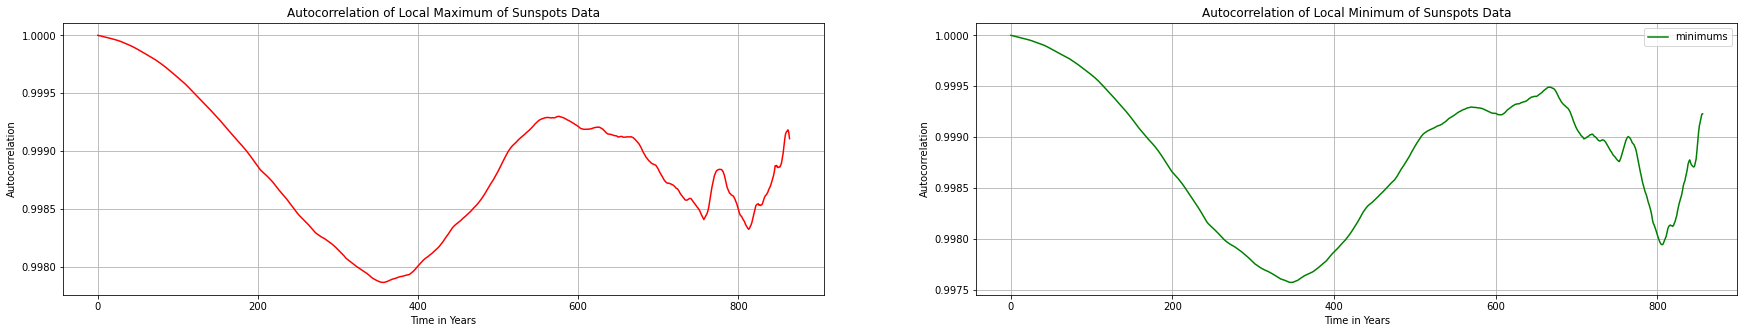

In [83]:
plt.figure(figsize=(30, 5))
plt.plot(dateSunspot[:200], sunspotsSunspot[:200], label="Sunspots")
plt.plot(dateSunspot[minsLocalSunspot[:50]].T[:50], sunspotsSunspot[minsLocalSunspot[:50]], "go", label="local minimum")
plt.plot(dateSunspot[maxsLocalSunspot[:50]].T[:50],sunspotsSunspot[maxsLocalSunspot[:50]], "r*", label="local maximum")
plt.title("The First Few Observations of the Sunspot Data Maked with Local Extrema")
plt.xlabel("Time in Years")
plt.ylabel("Number of Sunspots")
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(30, 5))
autoCorrelationMinSunspotsSunspot = autoCorrelation(minsLocalSunspot)
autoCorrelationMaxSunspotsSunspot = autoCorrelation(maxsLocalSunspot)
plt.subplot(1, 2, 1)
plt.plot(range(autoCorrelationMaxSunspotsSunspot.shape[0]), autoCorrelationMaxSunspotsSunspot, "r", label="maximums")
plt.title("Autocorrelation of Local Maximum of Sunspots Data")
plt.xlabel("Time in Years")
plt.ylabel("Autocorrelation")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(range(autoCorrelationMinSunspotsSunspot.shape[0]), autoCorrelationMinSunspotsSunspot, "g", label="minimums")
plt.title("Autocorrelation of Local Minimum of Sunspots Data")
plt.xlabel("Time in Years")
plt.ylabel("Autocorrelation")
plt.grid()
plt.legend()
plt.show()

It can be observed that the autocorrelation of the local extrama decays wevy slowly

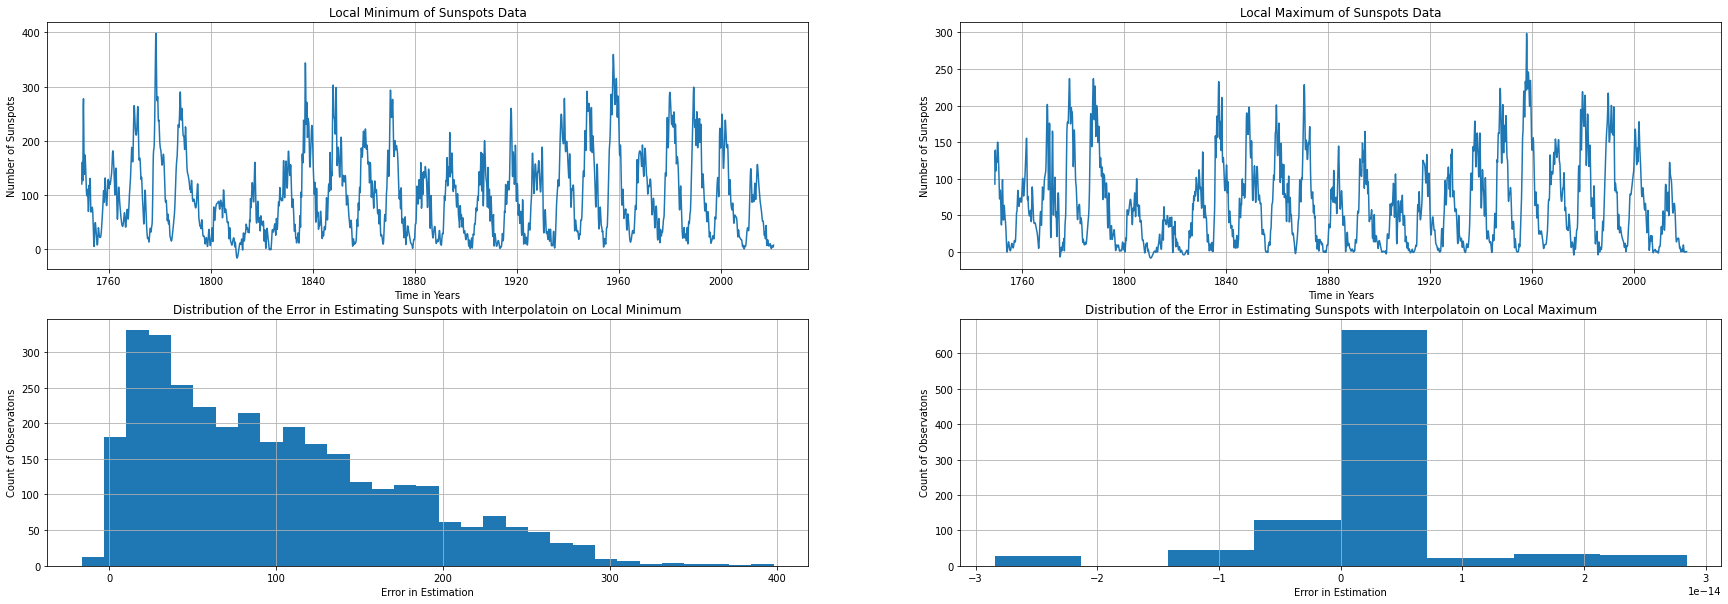

In [88]:
plt.figure(figsize=(30, 10))
plt.subplot(2,2,1)

splineMaxSunspot = interpolate.interp1d(dateSunspot.astype(np.float64)[maxsLocalSunspot]
, sunspotsSunspot[maxsLocalSunspot], kind="cubic")

plt.plot(dateSunspot[minsLocalSunspot[0]:minsLocalSunspot[-1]]
, splineMaxSunspot(dateSunspot[minsLocalSunspot[0]:minsLocalSunspot[-1]]), label="maximum")
plt.title("Local Minimum of Sunspots Data")
plt.xlabel("Time in Years")
plt.ylabel("Number of Sunspots")
plt.grid()

splineMinSunspot = interpolate.interp1d(dateSunspot.astype(np.float64)[minsLocalSunspot]
, sunspotsSunspot[minsLocalSunspot], kind="cubic")

plt.subplot(2,2,2)
plt.plot(dateSunspot[minsLocalSunspot[0]:minsLocalSunspot[-1]]
, splineMinSunspot(dateSunspot[minsLocalSunspot[0]:minsLocalSunspot[-1]]), label="minimum")
plt.title("Local Maximum of Sunspots Data")
plt.xlabel("Time in Years")
plt.ylabel("Number of Sunspots")
plt.grid()

deltaSplineMinSunspot = splineMinSunspot(dateSunspot[minsLocalSunspot])-sunspotsSunspot[minsLocalSunspot]
deltaSplineMaxSunspot = splineMaxSunspot(dateSunspot[maxsLocalSunspot[0]:maxsLocalSunspot[-1]])
-sunspotsSunspot[maxsLocalSunspot[0]:maxsLocalSunspot[-1]]
plt.subplot(2,2,3)
plt.hist(deltaSplineMaxSunspot, bins=np.linspace(np.min(deltaSplineMaxSunspot)
, np.max(deltaSplineMaxSunspot), deltaSplineMaxSunspot.shape[0]//100))
plt.title("Distribution of the Error in Estimating Sunspots with Interpolatoin on Local Minimum")
plt.xlabel("Error in Estimation")
plt.ylabel("Count of Observatons")
plt.grid()

plt.subplot(2,2,4)
plt.hist(deltaSplineMinSunspot, bins=np.linspace(np.min(deltaSplineMinSunspot)
, np.max(deltaSplineMinSunspot), deltaSplineMinSunspot.shape[0]//100))
plt.title("Distribution of the Error in Estimating Sunspots with Interpolatoin on Local Maximum")
plt.xlabel("Error in Estimation")
plt.ylabel("Count of Observatons")
plt.grid()
plt.show()

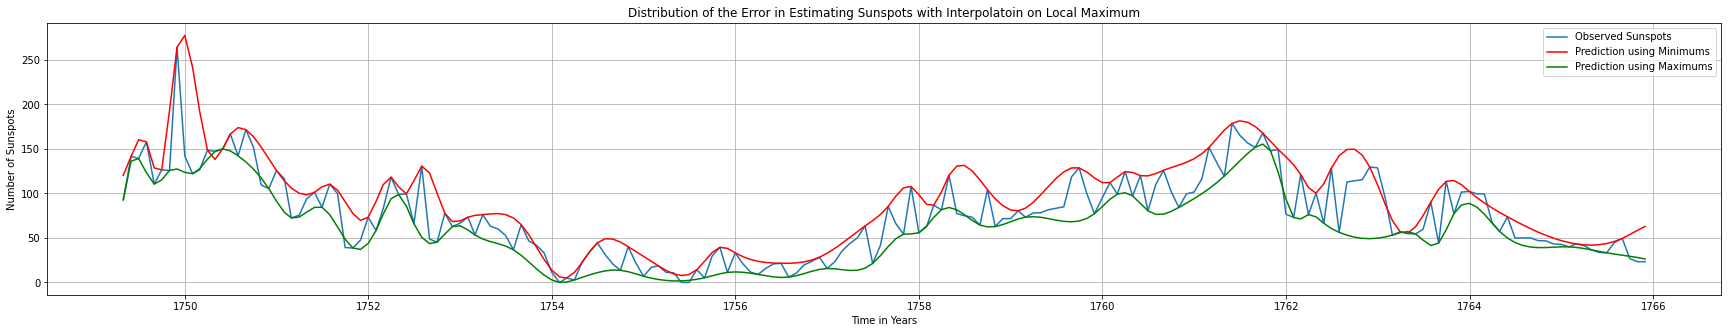

In [95]:
# The models developed here can be used only withing the range of indices which correspond to local maxima and minima
# Interpolation is valid only within the range in which data is available
# Find the minimum index over which interpolation is useful
maxIndex = min(minsLocalSunspot[-1], maxsLocalSunspot[-1])
# Find the maximum index over which interpolation is useful
minIndex = max(minsLocalSunspot[0], maxsLocalSunspot[0])

plt.figure(figsize=(30, 5))
plt.plot(dateSunspot[minIndex:maxIndex][:200], sunspotsSunspot[minIndex:maxIndex][:200], label="Observed Sunspots")
plt.plot(dateSunspot[minIndex:maxIndex][:200], splineMaxSunspot(dateSunspot[minIndex:maxIndex][:200]), "r", label="Prediction using Minimums")
plt.plot(dateSunspot[minIndex:maxIndex][:200], splineMinSunspot(dateSunspot[minIndex:maxIndex][:200]), "g", label="Prediction using Maximums")
plt.title("Distribution of the Error in Estimating Sunspots with Interpolatoin on Local Maximum")
plt.xlabel("Time in Years")
plt.ylabel("Number of Sunspots")
plt.grid()
plt.legend()
plt.show()

### Smoothing Functions  

A revolutionary approach in modellig time series is smoothing or filtering
Various kind of filters are available for smoothing
Lets look at some of the important filters

Smoothing is convolution operation using suitable wieghts. The _np.convolve_ function is used for carrying out convolution, however, the mode of operation of this fucntion is to be born in mind before using it. Similarly, _np.we

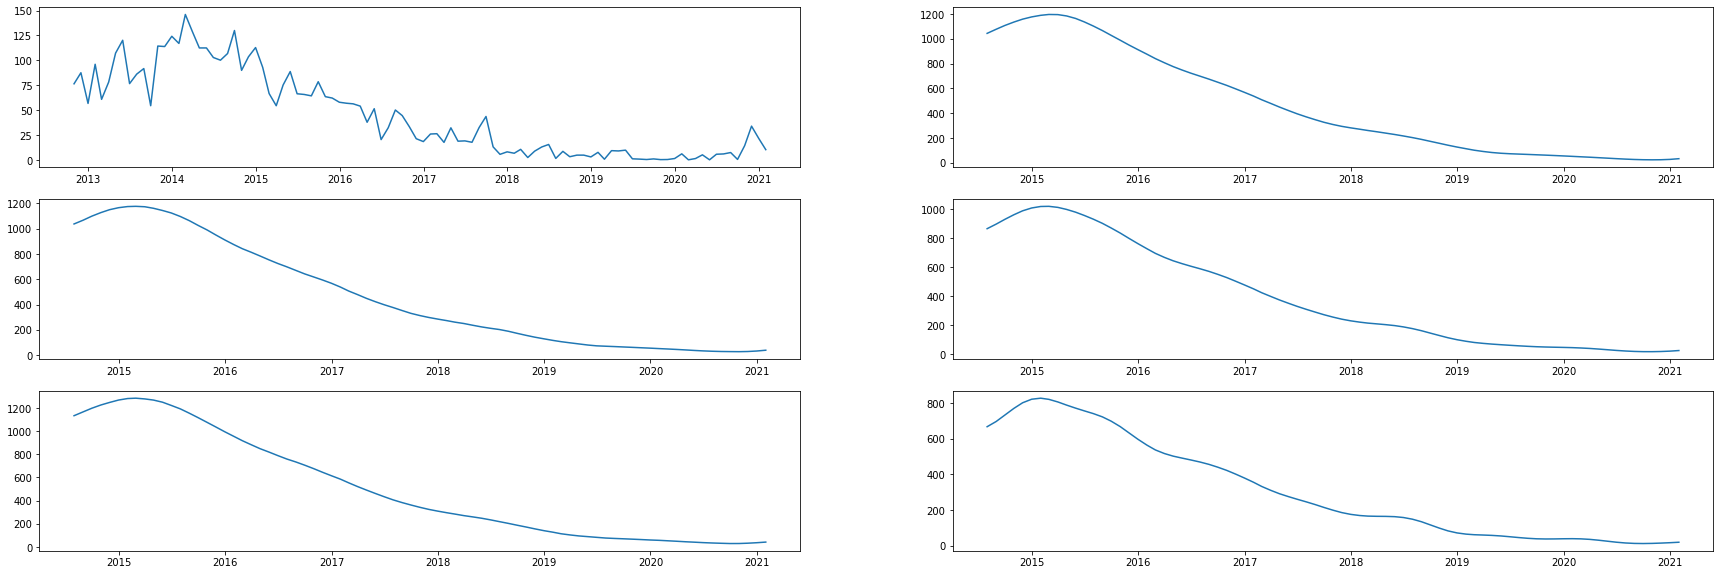

In [96]:
plt.figure(figsize=(30, 10))

# Only the latest hundered values are used for this fltering
curtialedSunspotsSunspots = sunspotsSunspot[-100:]
curtailedDateSunspots = dateSunspot[-100:]

plt.subplot(3, 2, 1)
plt.plot(curtailedDateSunspots, curtialedSunspotsSunspots)

# Smoothing is done using the convolve function with Hanning weights
smoothSunspotHanning = np.convolve(np.hanning(22), curtialedSunspotsSunspots, mode="valid")

plt.subplot(3, 2, 2)
plt.plot(curtailedDateSunspots[21:], smoothSunspotHanning)

# Smoothing is done using the convolve function with Bartlett weights
smoothSunspotsBartlett = np.convolve(np.bartlett(22), curtialedSunspotsSunspots, mode="valid")

plt.subplot(3, 2, 3)
plt.plot(curtailedDateSunspots[21:], smoothSunspotsBartlett)

# Smoothing is done using Blackman Weights
smoothSunspotsBlackman = np.convolve(np.blackman(22), curtialedSunspotsSunspots, mode="valid")

plt.subplot(3, 2, 4)
plt.plot(curtailedDateSunspots[21:], smoothSunspotsBlackman)

# Smoothing is done using Hamming Weights
smoothSunspotsHamming = np.convolve(np.hamming(22), curtialedSunspotsSunspots, mode="valid")

plt.subplot(3, 2, 5)
plt.plot(curtailedDateSunspots[21:], smoothSunspotsHamming)

# # Smoothing is done using Kaiser Weights
smoothSunspotsKaiser = np.convolve(np.kaiser(22, 14), curtialedSunspotsSunspots, mode="valid")
plt.subplot(3, 2, 6)
plt.plot(curtailedDateSunspots[21:], smoothSunspotsKaiser)
plt.show()

### Forecasting with ARMA Model

ARMA stands for Autoregressive Moving Average Model

We will try to fit an ARMA model of order (2, 1)

In [ ]:
# Load the sunn activity data in statsmiodels
sunactivityData = sm.datasets.sunspots.load_pandas().data


# A look at the data
# Notice that the index is numerical and not the data
sunactivityData.tail()

In [ ]:
# Convert the index of the data to years
sunactivityData.set_index(pd.to_datetime(sunactivityData.YEAR, format="%Y"), inplace=True)

# A look at the modified data
sunactivityData.head()

As susul 

In [ ]:
plt.figure(figsize=(30, 10))
plt.plot(sunactivityData.index, sunactivityData["SUNACTIVITY"])
plt.show()

In [ ]:
# Fit a ARMA model of order (2, 1) into the data
model = sm.tsa.ARMA(sunactivityData["SUNACTIVITY"], (2,1)).fit()

In [ ]:
# Get the year today
year_today = datetime.date.today().year

# Use the model to predict the values
# Here, the starting and ending dates of the prediction are to be supplied
# Further, dymanic predicition is switched on
prediction = model.predict('1984', str(year_today), dynamic=True)

# Set the figure size
plt.figure(figsize=(30, 15))

# Plot the origial data
sunactivityData["SUNACTIVITY"].plot()

# Plot the prediction
prediction.plot()

# Show the plot
plt.show()

### Designing the filter

An IIR or infinite Impulse Response filter can be designed using scipy.

The following parameters are required for making a filter

1. Frequency normalized from 0 to 1
2. Maximum loss
3. Minimum attenuation
4. Filter Type

In [ ]:
b, a = signal.iirdesign(wp = 0.2, ws = 0.1, gstop = 60, gpass = 1, ftype = "butter")

In [ ]:
filtered = signal.lfilter(b, a, sunactivityData)

In [ ]:
plt.plot(sunactivityData.index, filtered[:,1])


### Cointegration

The __Augmented Dickey Fuller Test__ is used to measure the ointegraiton of timeseries data.

In [ ]:
def calcAdf(x, y):
    result = stat.OLS(x, y).fit()
    return ts.adfuller(result.resid)

In [ ]:
N = 501
t = np.linspace(-2*np.pi, 2*np.pi, N)
sine = np.sin(np.sin(t))
print(calcAdf(sine, sine))

In [ ]:
noise  = np.random.normal(0, 0.01, N)

In [ ]:
cosine = 100*np.cos(t)+10
print(calcAdf(sine, cosine+noise))

In [ ]:
url = "../resources/data/stocksData/GRASIM.csv"
grasim = np.loadtxt(url
, delimiter=","
, dtype=np.dtype([("date", "datetime64[s]"), ("data", "float64")])
, usecols=(0, 8)
, unpack=True
, skiprows=1)

In [ ]:
url = "../resources/data/stocksData/HDFC.csv"
hdfc = np.loadtxt(url
, delimiter=","
, dtype=np.dtype([("date", "datetime64[s]"), ("data", "float64")])
, usecols=(0, 8)
, unpack=True
, skiprows=1)

In [ ]:
print(calcAdf(hdfc[1], grasim[1]))

### chaper Six: The Scientific Python Ecosystem

SciPy is built on top of NumPy, and contains additional functionalities such as numerical integration, optimization, statistics, and special functions. 

In this chaper we wll look at:
1. Numerical integration
2. Interpolation
3. Cython with NumPy
4. Clustering with scikit-learn
5. detecting corners
6. Comparing NumPy to Blaze

#### Numerical Integration
The numerical integration package in SciPy is __scipy.integrate__ which has no equivalent in NumPy. The quad fucniton is to integrate a one-variable fucntion between two points.

In [ ]:
# The Gaussian integral with the quad function can be done with the following code
print("Gaussian Integral: ", np.sqrt(np.pi), scipy.integrate.quad(lambda x: np.exp(-x**2), -np.inf, np.inf))

#### Interpolation

The __scipy,interpolate__ function interpolates a fucntion based on experimental data. The interp1d class creates a linear or cubic interpolation fucntion for one variable function and interp2d works the same for two dimension fucntion.

In [102]:
# Create data points and add noise

x = np.linspace(-10, 10, 36)
noise = 0.1*np.random.random(len(x))
signal = np.sinc(x)+noise

In [103]:
# Create a linear interpolation function, and then apply it to an input array with five times as many data points

interpolated = scipy.interpolate.interp1d(x, signal)
x2 = np.linspace(-10, 10, 180)
y = interpolated(x2)

In [104]:
cubic = scipy.interpolate.interp1d(x, signal, kind="cubic")
y2 = cubic(x2)

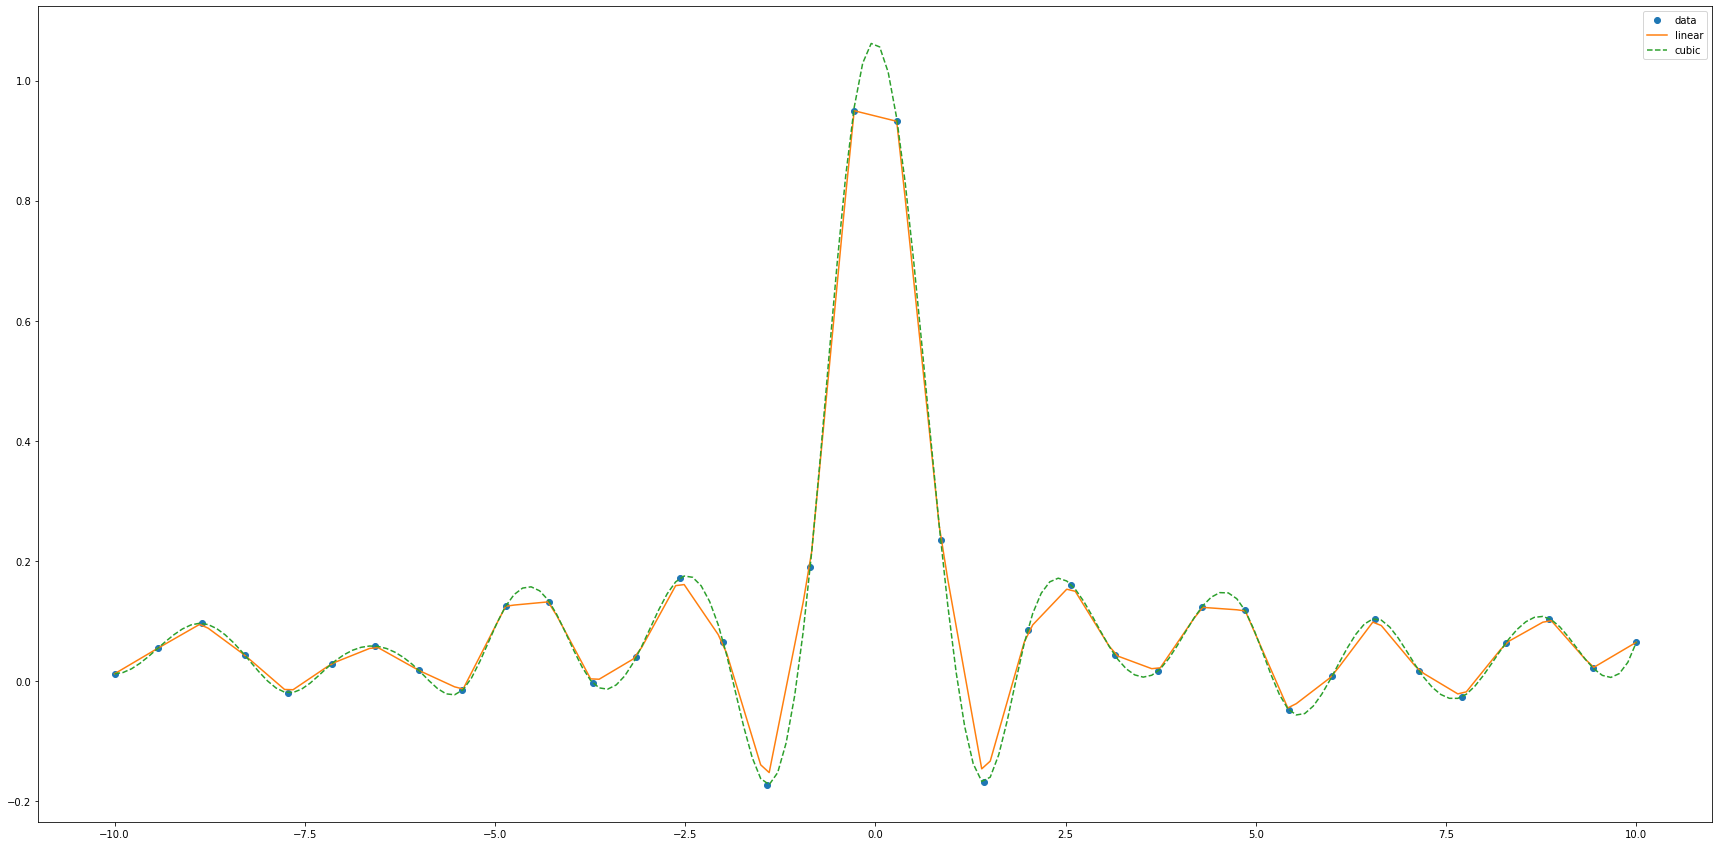

In [105]:
plt.figure(figsize=(30, 15))
plt.plot(x, signal, "o", label="data")
plt.plot(x2, y, "-", label="linear")
plt.plot(x2, y2, "--", label="cubic")
plt.legend()
plt.show()


#### Using Cyton with NumPy

It is a realtively young programming language based on Python. Cython is a compiled language. 

#### Detecting Corners

In [ ]:
dataset = load_sample_images()
img = dataset.images[0]

In [ ]:
harris_coords = harris(img)